<a href="https://colab.research.google.com/github/Renuga16/BigMart-Sales-Analysis-and-Prediction/blob/main/project_01_Predictive_Analysis_Using_Social_Profile_in_Online_P2P_Lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data=pd.read_csv('/content/drive/My Drive/prosperLoanData.csv')

In [ ]:
Data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


Exploratort Data Analysis

In [ ]:
Data.shape

(113937, 81)

In [ ]:
Data.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [ ]:
for col in Data.columns:
  print('{}:{}'.format(col,Data[col].unique()))

ListingKey:['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
ListingNumber:[ 193129 1209647   81716 ... 1069178  539056 1140093]
ListingCreationDate:['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
CreditGrade:['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Term:[36 60 12]
LoanStatus:['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ClosedDate:['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00']
BorrowerAPR:[0.16516 0.12016 0.28269 ... 0.22674 0.3477  0.19543]
BorrowerRate:[0.158  0.092 

<Axes: >

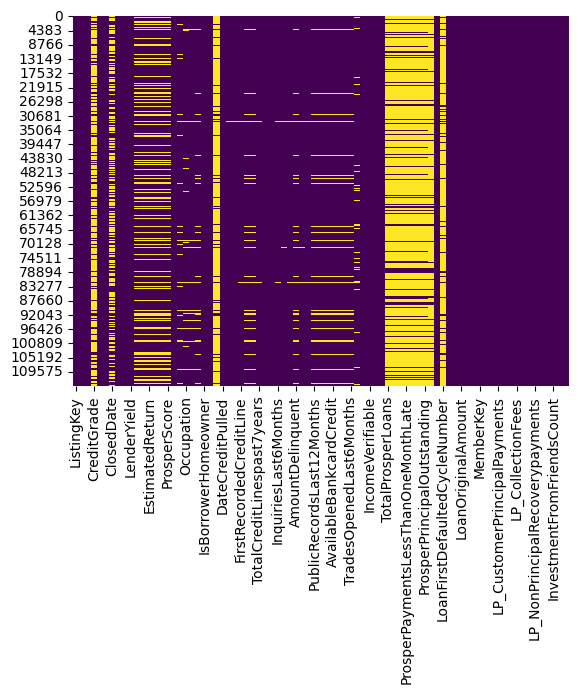

In [ ]:
sns.heatmap(Data.isnull(),cbar=False,cmap='viridis')

In [ ]:
Data.duplicated().sum()


0

In [ ]:
#checking the captalization
Data['LoanStatus'].value_counts(dropna=False)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Handling Missing Values

In [ ]:
categorical=Data.select_dtypes("object")
categorical

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,NaN,Current,NaN,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,NaN,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [ ]:
continuous=Data.select_dtypes("number")
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [ ]:
_categorical.isna().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [ ]:
categorical=categorical.fillna(categorical.mode().iloc[0])

In [ ]:
categorical

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,C,Current,2014-03-04 00:00:00,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,C,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,C,Current,2014-03-04 00:00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,C,Current,2014-03-04 00:00:00,D,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,C,Current,2014-03-04 00:00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,C,FinalPaymentInProgress,2014-03-04 00:00:00,A,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,C,Current,2014-03-04 00:00:00,D,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,C,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [ ]:
categorical.isna().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [ ]:
continuous=continuous.fillna(continuous.median().iloc[0])
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [ ]:
continuous.isna().sum()

ListingNumber                  0
Term                           0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 61, dtype: int64

In [ ]:
result=pd.concat([continuous, categorical],axis=1,join='inner')
display(result)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [ ]:
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   Term                                 113937 non-null  int64  
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  EmploymentSta

In [ ]:
result.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,131.992040,0.192764,0.182701,153299.866132,153299.800330,153299.812069,153302.773269,153304.171753,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,8894.955388,0.074818,0.074516,261848.286590,261848.325114,261848.318241,261846.584588,261845.765840,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.132600,0.054900,0.080220,3.000000,5.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209790,0.184000,0.173000,0.195710,0.099000,0.109300,5.000000,7.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283860,0.250000,0.240000,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,600554.000000,0.497500,0.492500,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [ ]:
result.isna().sum()

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeRange               0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 78, dtype: int64

<Axes: >

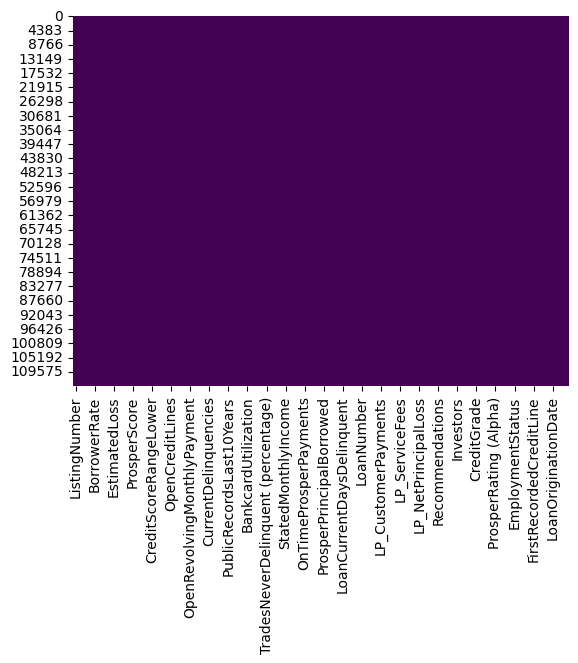

In [ ]:
#visualizing the missing values
sns.heatmap(result.isnull(),cbar=False,cmap='viridis')

In [ ]:
print(result.isnull().values.sum())

0


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

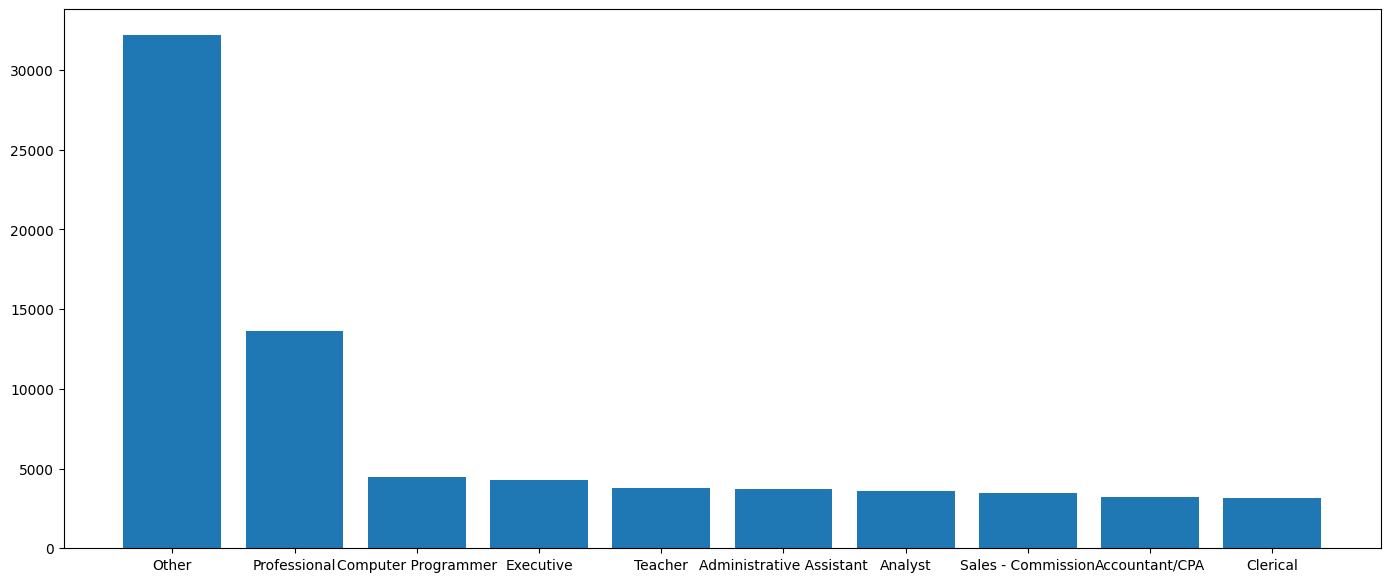

In [ ]:
plt.figure(figsize=(17,7))
plt.bar(list(result['Occupation'].value_counts()[0:10].keys()),list(result['Occupation'].value_counts()[0:10]))
plt.bar

<ipython-input-49-c23e57c0ebf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result.corr(),cbar=True,cmap='Blues')


<Axes: >

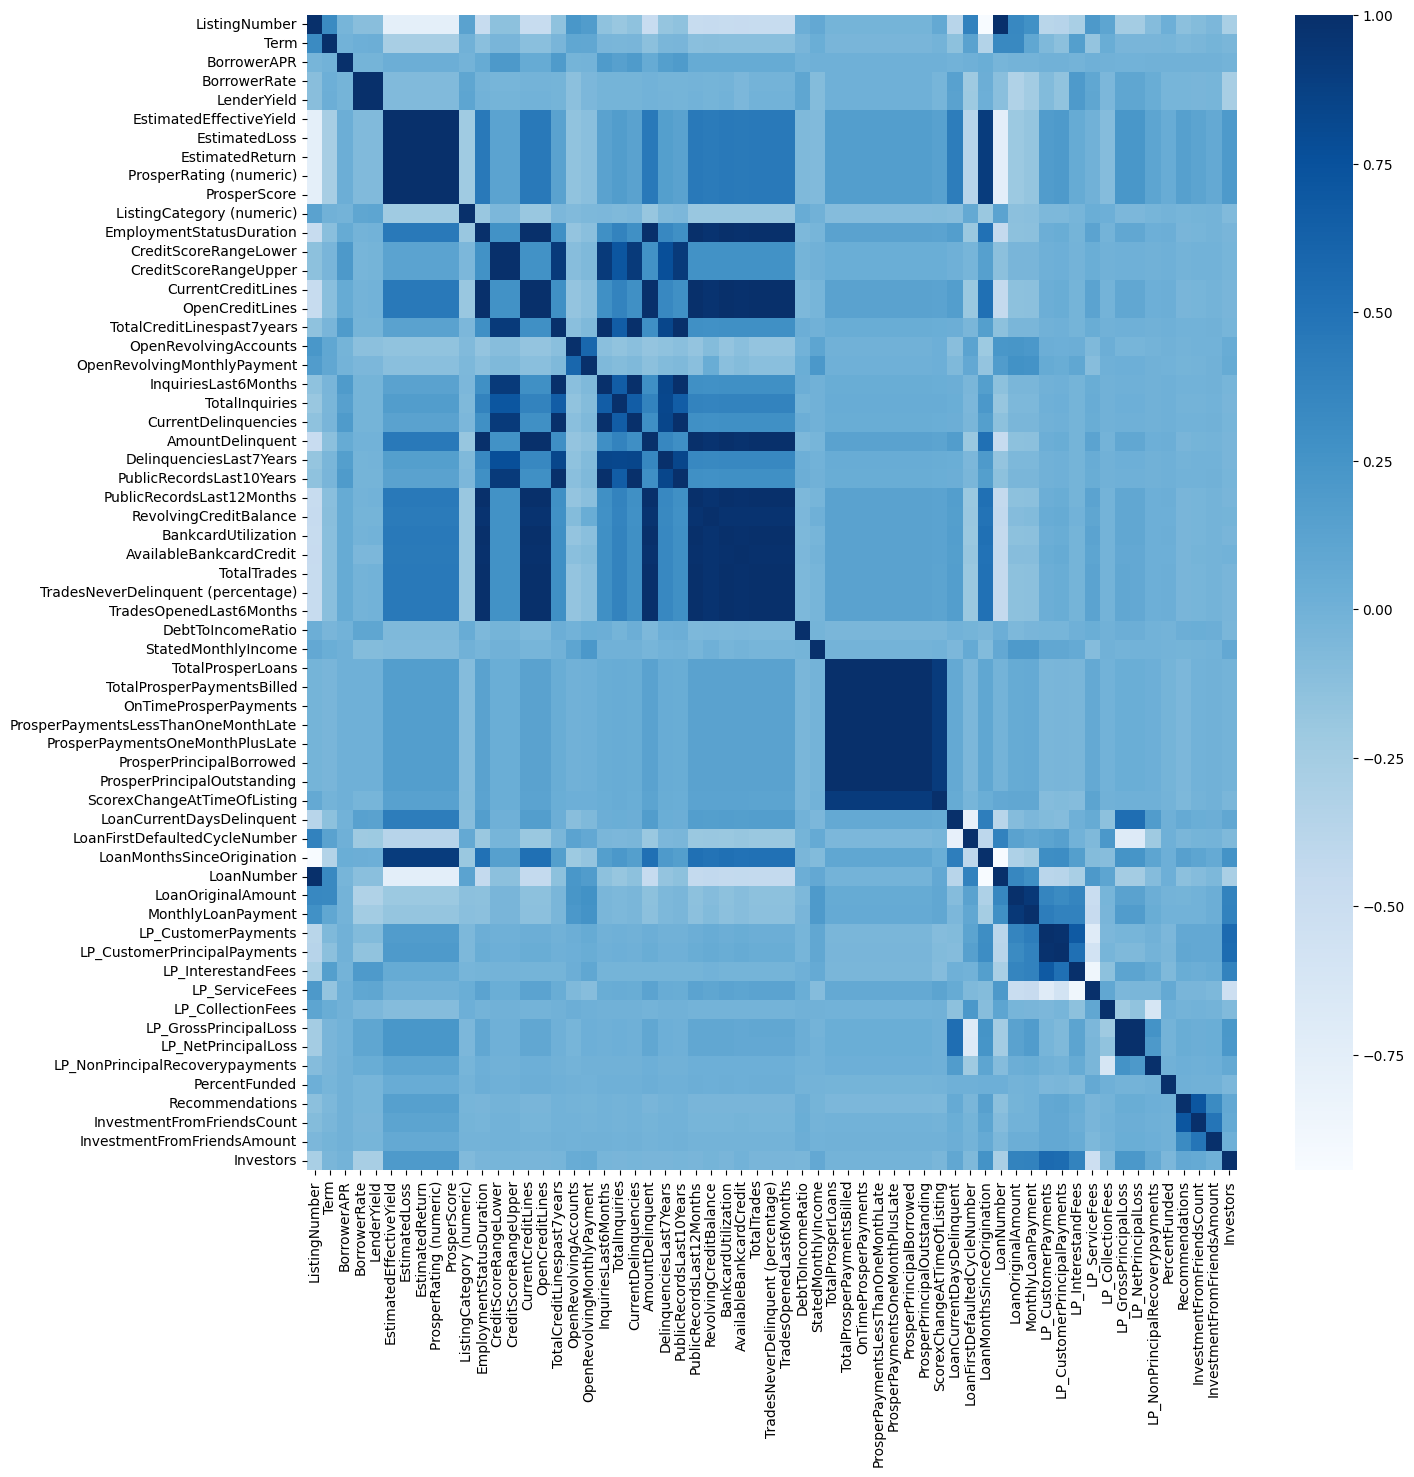

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(result.corr(),cbar=True,cmap='Blues')

(array([9.4650e+04, 8.0600e+02, 5.0180e+03, 1.1992e+04, 2.6500e+02,
        5.0000e+00, 3.1300e+02, 3.6300e+02, 3.0400e+02, 2.2100e+02]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

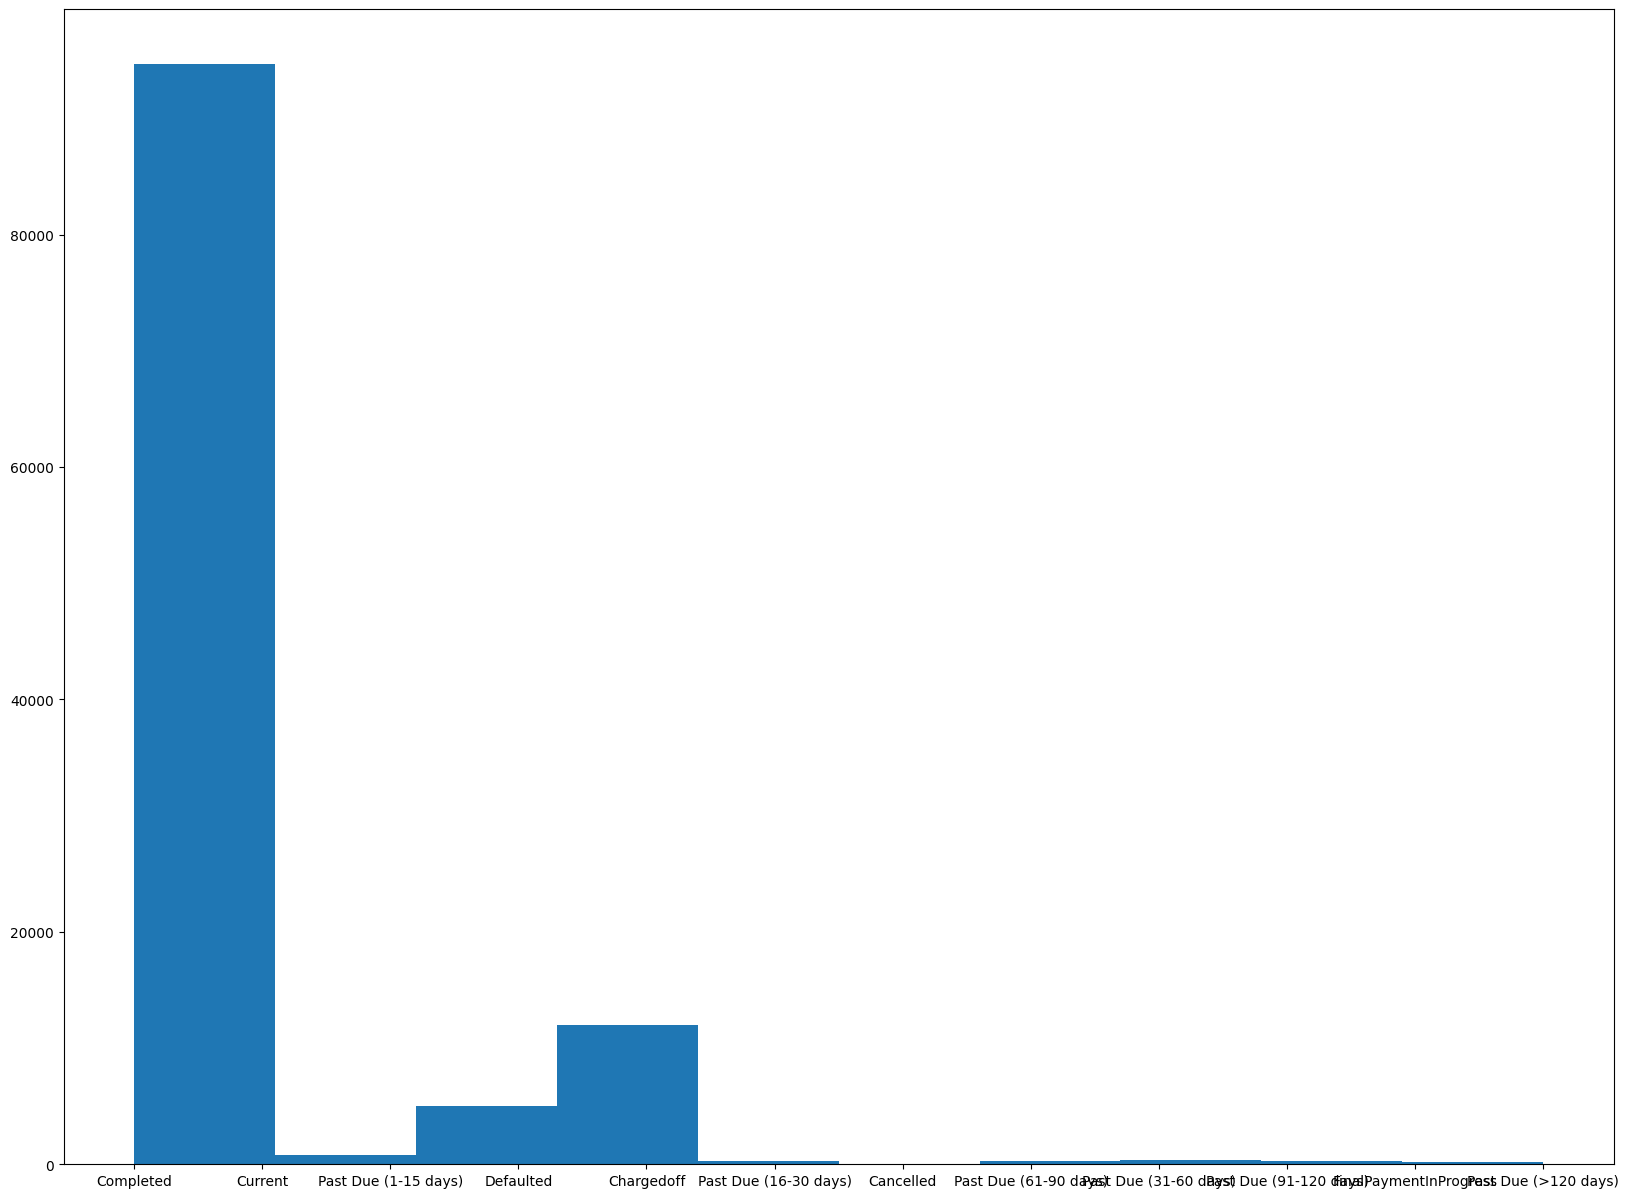

In [ ]:
plt.figure(figsize=(20,15))
plt.hist(result['LoanStatus'])

(array([6.3000e+01, 1.1966e+04, 2.5660e+04, 2.6902e+04, 1.8819e+04,
        1.7516e+04, 1.0953e+04, 2.0500e+03, 2.0000e+00, 6.0000e+00]),
 array([0.     , 0.04975, 0.0995 , 0.14925, 0.199  , 0.24875, 0.2985 ,
        0.34825, 0.398  , 0.44775, 0.4975 ]),
 <BarContainer object of 10 artists>)

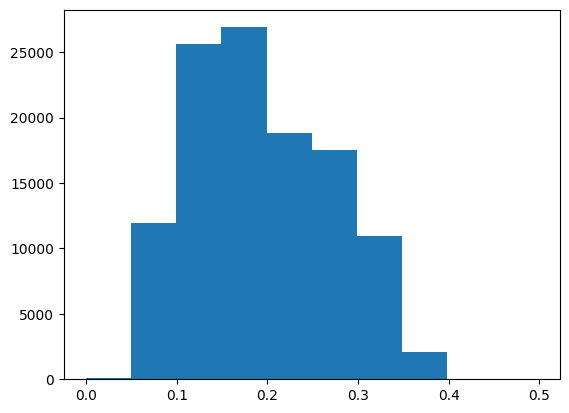

In [ ]:
plt.hist(result['BorrowerRate'])

(array([1.4700e+02, 1.2390e+04, 2.6436e+04, 2.7063e+04, 1.9921e+04,
        1.5778e+04, 1.2169e+04, 2.5000e+01, 5.0000e+00, 3.0000e+00]),
 array([-0.01   ,  0.04025,  0.0905 ,  0.14075,  0.191  ,  0.24125,
         0.2915 ,  0.34175,  0.392  ,  0.44225,  0.4925 ]),
 <BarContainer object of 10 artists>)

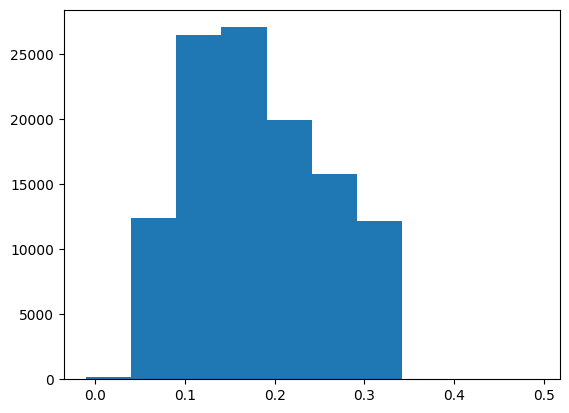

In [ ]:
plt.hist(result['LenderYield'])


Text(0, 0.5, 'MonthlyLoanPayment')

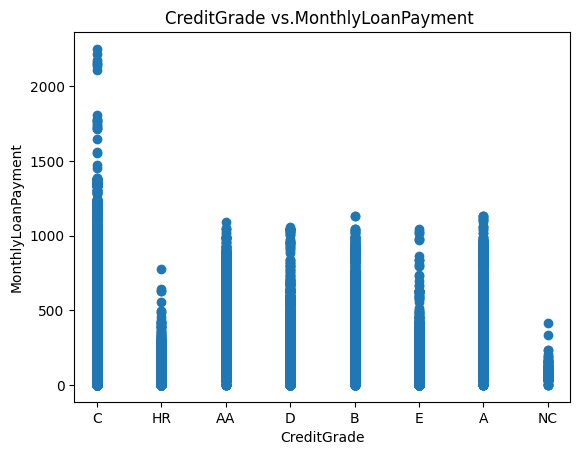

In [ ]:
plt.scatter(result.CreditGrade,result.MonthlyLoanPayment)
plt.title('CreditGrade vs.MonthlyLoanPayment ')
plt.xlabel('CreditGrade')
plt.ylabel('MonthlyLoanPayment')

Text(0, 0.5, 'LoanStatus')

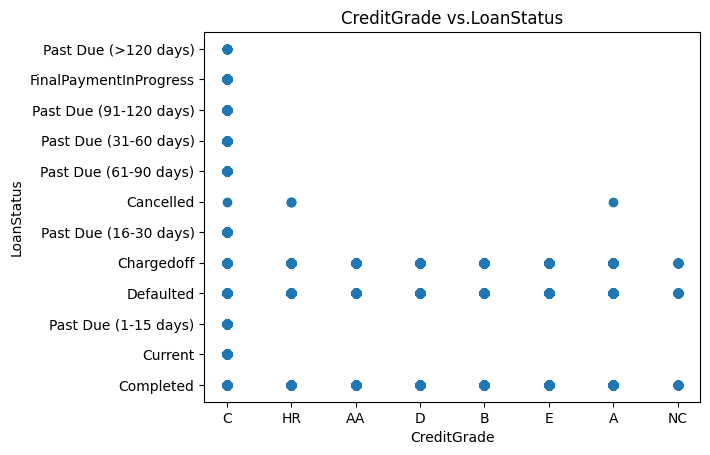

In [ ]:
plt.scatter(result.CreditGrade,result.LoanStatus)
plt.title('CreditGrade vs.LoanStatus')
plt.xlabel('CreditGrade')
plt.ylabel('LoanStatus')

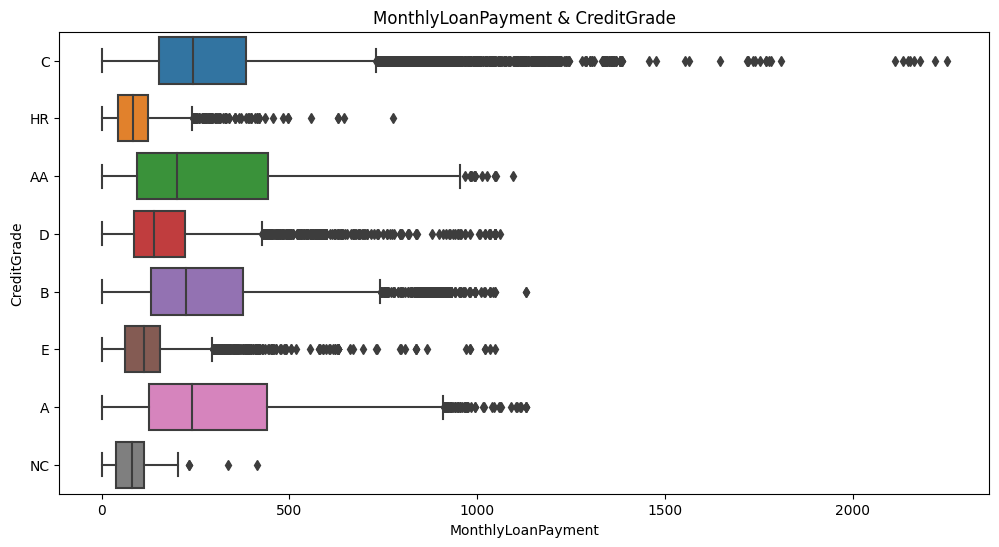

In [ ]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=result,x='MonthlyLoanPayment',y='CreditGrade');
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('CreditGrade');
plt.title('MonthlyLoanPayment & CreditGrade');


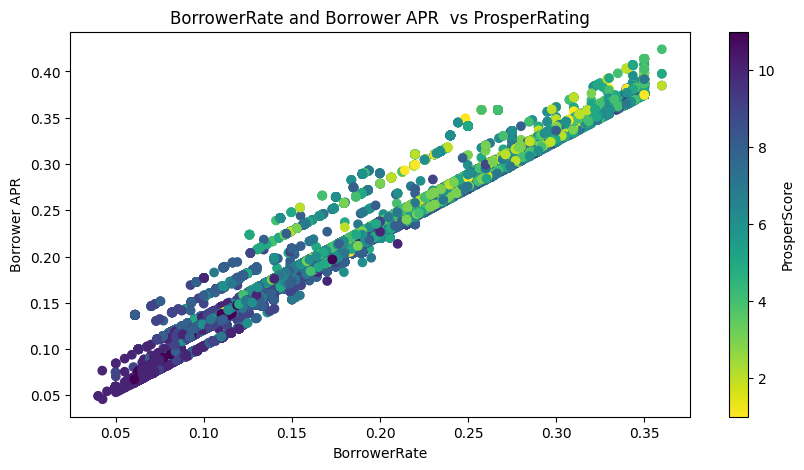

In [ ]:
plt.figure(figsize = [10, 5])
plt.scatter(data=Data,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate and Borrower APR  vs ProsperRating');


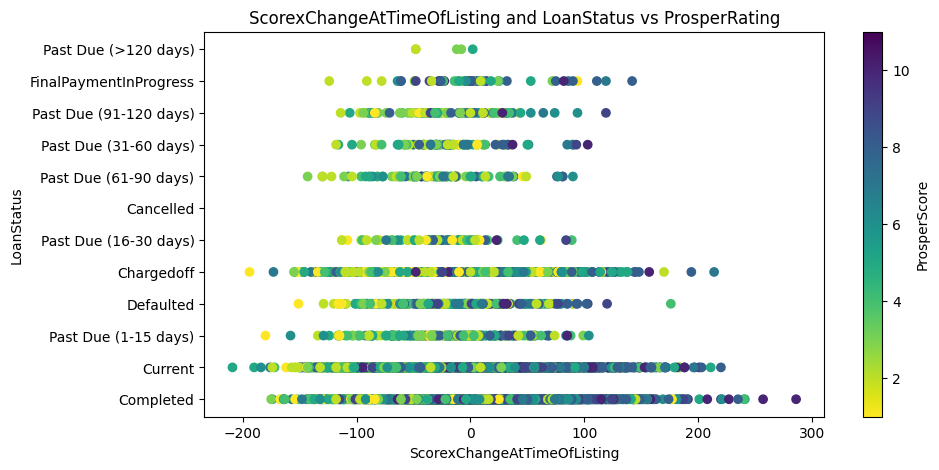

In [ ]:
##### ScorexChangeAtTimeOfListing and LoanStatus vs ProsperRating'

plt.figure(figsize = [10, 5])
plt.scatter(data=Data,x='ScorexChangeAtTimeOfListing',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('ScorexChangeAtTimeOfListing')
plt.ylabel('LoanStatus')
plt.title('ScorexChangeAtTimeOfListing and LoanStatus vs ProsperRating');


#### Negative Relation between LoanStatus & ScorexChangeAtTimeOfListing and many LoanStatus has lower prosper score.


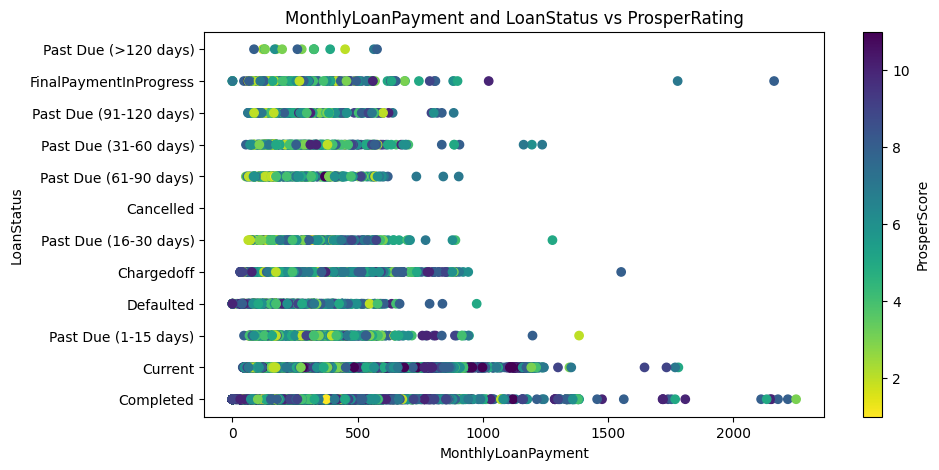

In [ ]:
##### 'MonthlyLoanPayment and LoanStatus vs ProsperRating'

plt.figure(figsize = [10, 5])
plt.scatter(data=Data,x='MonthlyLoanPayment',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanStatus')
plt.title('MonthlyLoanPayment and LoanStatus vs ProsperRating');

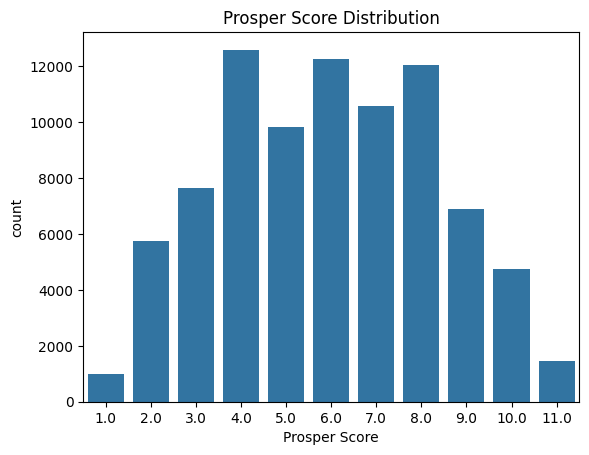

In [ ]:
#Prosper Score Distribution
base_color = sns.color_palette()[0]
sns.countplot(data=Data,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');


#### Prosper score of value 4 and 6 and 8 are the most common.

In [ ]:
# Changing Loan orgination date into date time format
Data['LoanOriginationDate'] = pd.to_datetime(Data['LoanOriginationDate'])

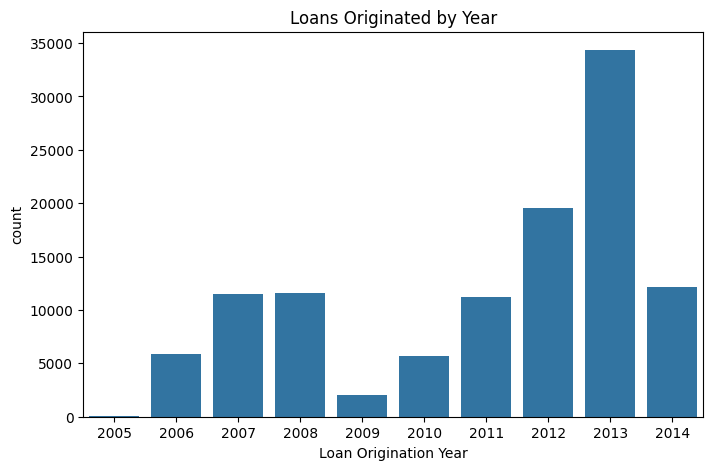

In [ ]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sns.countplot(data=Data,x=Data['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

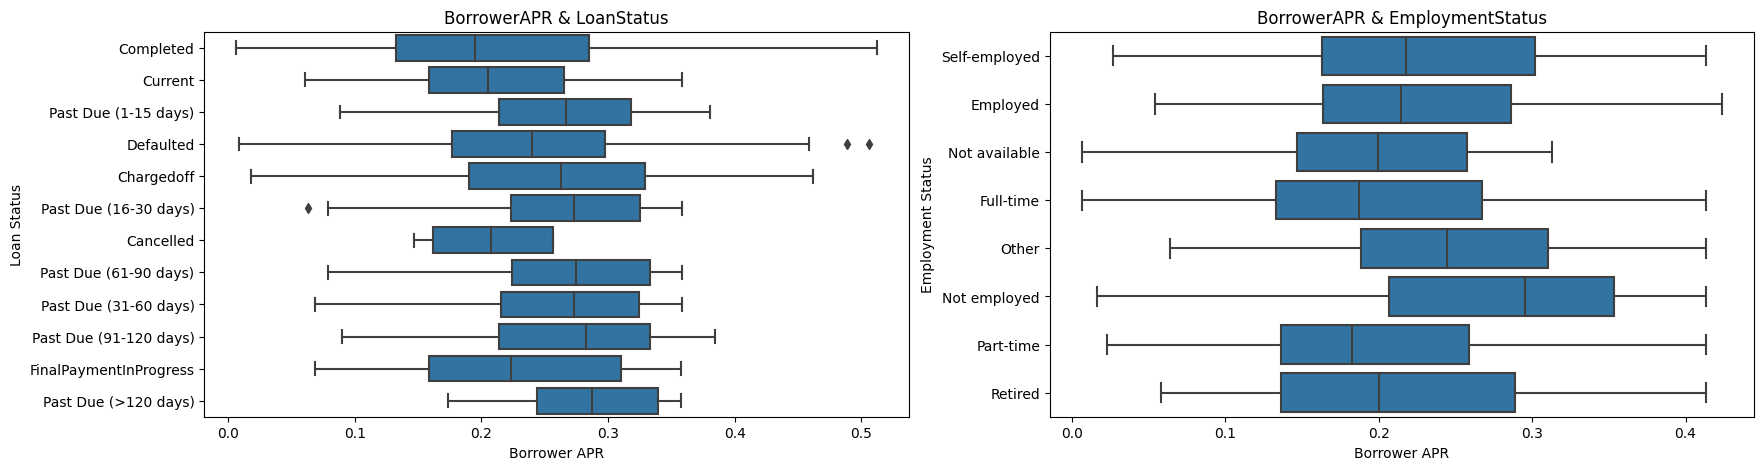

In [ ]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=Data,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=Data,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');


##### On the left: Current and completed loans have lower rate than the past-due loans
####### On the right: Employed people have lower rates than not employed

In [ ]:
result['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [ ]:
### Dropping column
result.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,C,CO,Other,Self-employed,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,A,CO,Professional,Employed,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,C,GA,Other,Not available,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,A,GA,Skilled Labor,Employed,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,D,MN,Executive,Employed,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

result[cols] = result[cols].apply(LabelEncoder().fit_transform)

# Print head

result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,3,5,35,7,14346,8637,3,100336,17,11070
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,5,41,0,111882,6615,4,69836,7,10301
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,3,10,35,2,6445,8925,6,46302,1,33780
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,10,50,0,64723,2245,3,70775,31,54938
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,4,23,19,0,85856,9496,2,71386,23,19464


In [ ]:
result['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   BorrowerAPR                         113937 non-null  float64
 3   BorrowerRate                        113937 non-null  float64
 4   LenderYield                         113937 non-null  float64
 5   ProsperScore                        113937 non-null  float64
 6   ListingCategory (numeric)           113937 non-null  int64  
 7   EmploymentStatusDuration            113937 non-null  float64
 8   CreditScoreRangeLower               113937 non-null  float64
 9   CreditScoreRangeUpper               113937 non-null  float64
 10  CurrentCreditLines                  113937 non-null  float64
 11  OpenCreditLines           

In [ ]:
# converting to binary data
result_one = pd.get_dummies(result["LoanStatus"])
print(result_one)

        Cancelled  Chargedoff  Completed  Current  Defaulted  \
0               0           0          1        0          0   
1               0           0          0        1          0   
2               0           0          1        0          0   
3               0           0          0        1          0   
4               0           0          0        1          0   
...           ...         ...        ...      ...        ...   
113932          0           0          0        1          0   
113933          0           0          0        0          0   
113934          0           0          0        1          0   
113935          0           0          1        0          0   
113936          0           0          0        1          0   

        FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                            0                     0                      0   
1                            0                     0                     

In [ ]:
# display result
result_two = pd.concat((result_one, result), axis=1)
result_two = result_two.drop(["LoanStatus"], axis=1)
result_two = result_two.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= result_two.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus  ListingNumber  Term  BorrowerAPR  BorrowerRate  \
0                1         193129    36      0.16516        0.1580   
1                0        1209647    36      0.12016        0.0920   
2                1          81716    36      0.28269        0.2750   
3                0         658116    36      0.12528        0.0974   
4                0         909464    36      0.24614        0.2085   
...            ...            ...   ...          ...           ...   
113932           0         753087    36      0.22354        0.1864   
113933           0         537216    36      0.13220        0.1110   
113934           0        1069178    60      0.23984        0.2150   
113935           1         539056    60      0.28408        0.2605   
113936           0        1140093    36      0.13189        0.1039   

        LenderYield  ProsperScore  ListingCategory (numeric)  \
0            0.1380      600554.0                          0   
1            0.0820           7

In [ ]:
data

,LoanStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,...,3,5,35,7,14346,8637,3,100336,17,11070
1,0,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,...,0,5,41,0,111882,6615,4,69836,7,10301
2,1,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,...,3,10,35,2,6445,8925,6,46302,1,33780
3,0,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,...,0,10,50,0,64723,2245,3,70775,31,54938
4,0,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,...,4,23,19,0,85856,9496,2,71386,23,19464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,...,3,14,23,0,72603,7142,4,68807,15,16553
113933,0,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,...,0,38,41,0,45661,5119,5,43442,30,30365
113934,0,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,...,4,43,35,0,100209,8773,3,97553,32,5615
113935,1,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,...,3,10,22,1,46062,5782,3,38880,30,57908


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   LoanStatus                          113937 non-null  uint8  
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   BorrowerAPR                         113937 non-null  float64
 4   BorrowerRate                        113937 non-null  float64
 5   LenderYield                         113937 non-null  float64
 6   ProsperScore                        113937 non-null  float64
 7   ListingCategory (numeric)           113937 non-null  int64  
 8   EmploymentStatusDuration            113937 non-null  float64
 9   CreditScoreRangeLower               113937 non-null  float64
 10  CreditScoreRangeUpper               113937 non-null  float64
 11  CurrentCreditLines        

In [ ]:
data.columns

Index(['LoanStatus', 'ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'L

Spliting data into training and testing data

In [ ]:
### Building a Model
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']

In [ ]:
X

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,3,5,35,7,14346,8637,3,100336,17,11070
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,5,41,0,111882,6615,4,69836,7,10301
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,3,10,35,2,6445,8925,6,46302,1,33780
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,10,50,0,64723,2245,3,70775,31,54938
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,4,23,19,0,85856,9496,2,71386,23,19464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,719.0,...,3,14,23,0,72603,7142,4,68807,15,16553
113933,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,719.0,...,0,38,41,0,45661,5119,5,43442,30,30365
113934,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,719.0,...,4,43,35,0,100209,8773,3,97553,32,5615
113935,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,699.0,...,3,10,22,1,46062,5782,3,38880,30,57908


In [ ]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    1
113936    0
Name: LoanStatus, Length: 113937, dtype: uint8

In [ ]:
### Splitting the data into training data & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(113937, 61) (91149, 61) (22788, 61)


Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.20245712, 0.0509098 , 0.20972087, 0.17096919, 0.16567503,
       0.08444878, 0.05200677, 0.01574728, 0.02368862, 0.01955148,
       0.01432118, 0.02017142, 0.00516818, 0.00948501, 0.02054304,
       0.00102488, 0.00735687, 0.00298371, 0.0074939 , 0.00336312,
       0.00292777, 0.00815438, 0.0166684 , 0.02088512, 0.01454516,
       0.01489283, 0.01239666, 0.01148544, 0.01355076, 0.00702686,
       0.01666862, 0.07443559, 0.07256459, 0.20225626, 0.20153347,
       0.06021339, 0.13983818, 0.23848124, 0.55849526, 0.07675901,
       0.07478967, 0.0089228 , 0.06988936, 0.06762943, 0.01299367,
       0.01102418, 0.00873207, 0.00866022, 0.00688125, 0.07822741,
       0.38217032, 0.02935152, 0.00930789, 0.00773345, 0.09610527,
       0.20171549, 0.01257365, 0.01997876, 0.00278827, 0.19809044,
       0.01835621])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LP_CustomerPrincipalPayments    0.558495
ClosedDate                      0.382170
LP_CustomerPayments             0.238481
BorrowerAPR                     0.209721
ListingNumber                   0.202457
                                  ...   
DelinquenciesLast7Years         0.003363
CurrentDelinquencies            0.002984
PublicRecordsLast10Years        0.002928
LoanKey                         0.002788
InquiriesLast6Months            0.001025
Length: 61, dtype: float64

<Axes: >

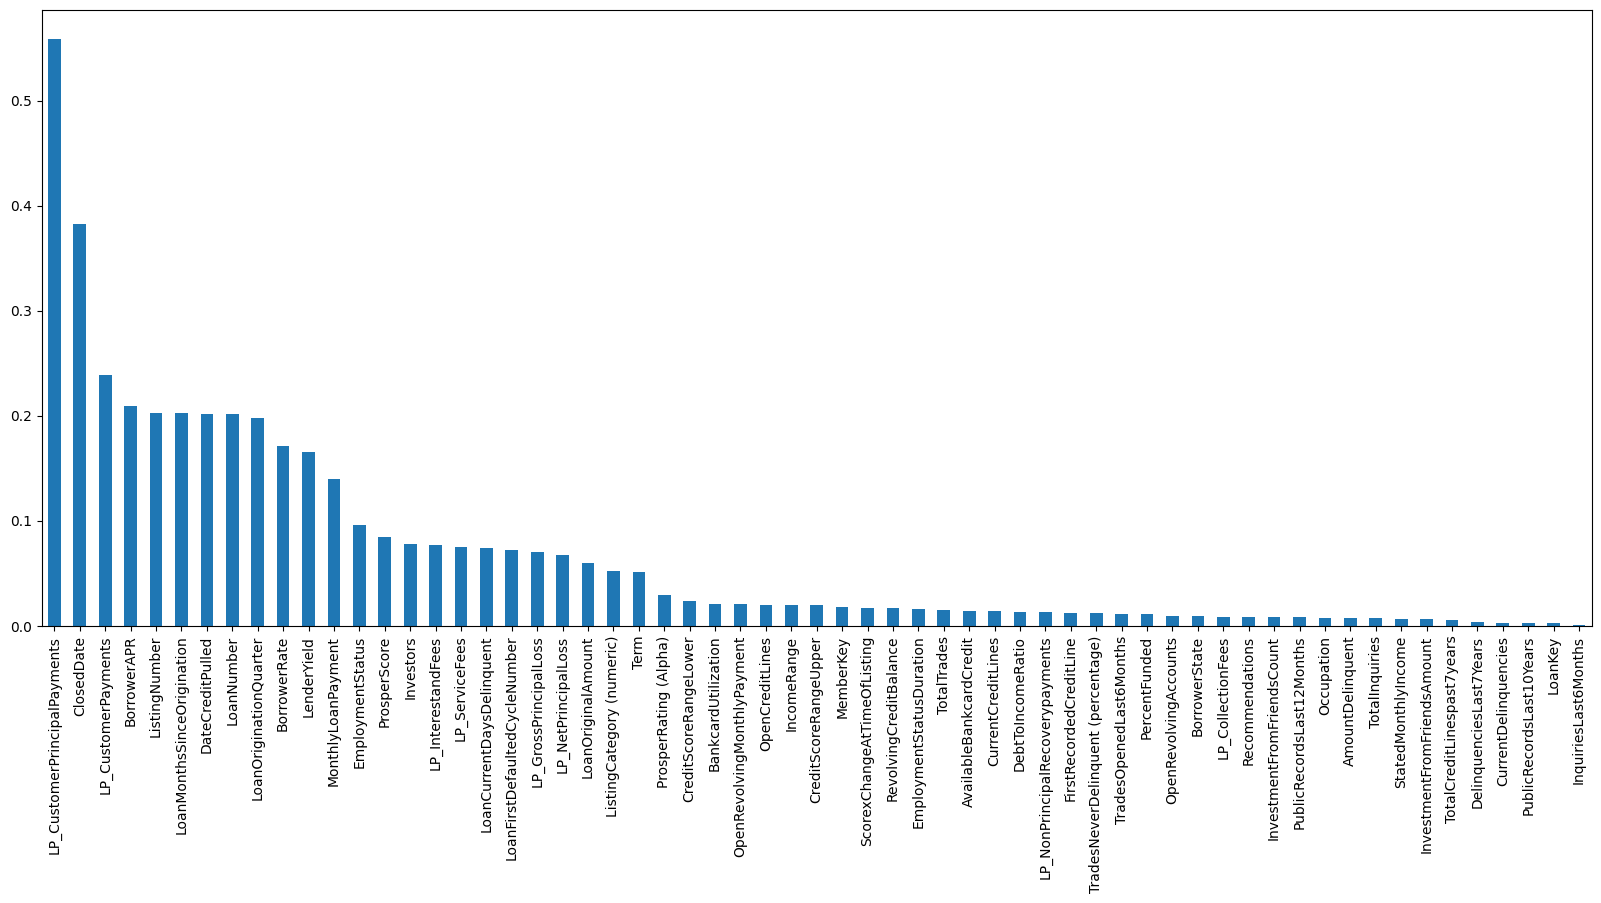

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ListingNumber', 'BorrowerAPR', 'BorrowerRate',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'ClosedDate', 'DateCreditPulled',
       'LoanOriginationQuarter'],
      dtype='object')

In [ ]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

Model creation

Applying logisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train_std, Y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 92.14%


Text(0.5, 1.0, 'Confusion Matrix')

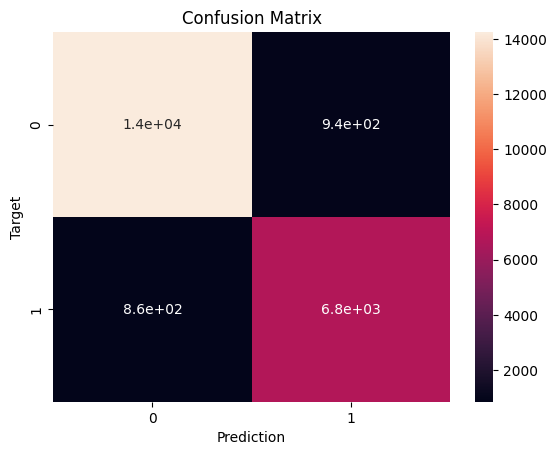

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15179
           1       0.88      0.89      0.88      7609

    accuracy                           0.92     22788
   macro avg       0.91      0.91      0.91     22788
weighted avg       0.92      0.92      0.92     22788



In [ ]:
confusion_matrix(Y_test,y_pred)

array([[14244,   935],
       [  856,  6753]])

In [ ]:
(14281+6794)/(14281+898+815+6794)

0.9248288572933123